In [1]:
import pandas as pd
import os
import numpy as np


In [2]:
import streamlit as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import timedelta
import matplotlib.pyplot as plt


In [3]:
df= pd.read_csv("Desktop/DATA TYPES/100 Sales Records.csv")

In [4]:
# Convert date columns
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])


In [5]:
# Create daily summary
daily_sales = df.groupby("Order Date")[["Total Revenue", "Total Profit"]].sum().reset_index()


In [6]:
# Save to CSV (for automation)
daily_sales.to_csv("daily_sales_summary.csv", index=False)


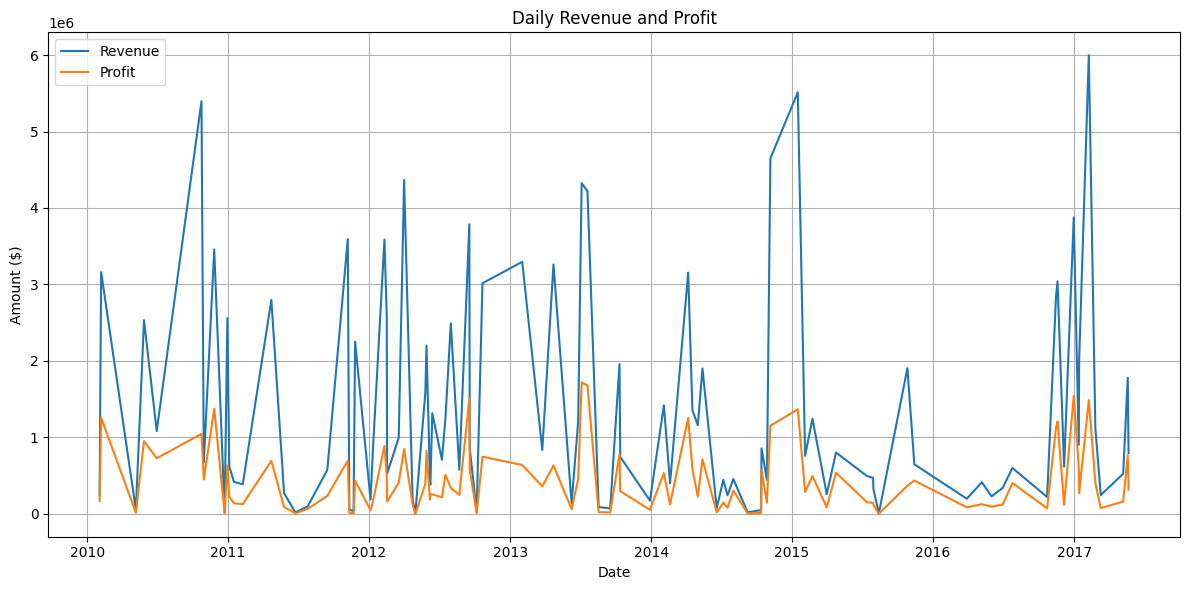

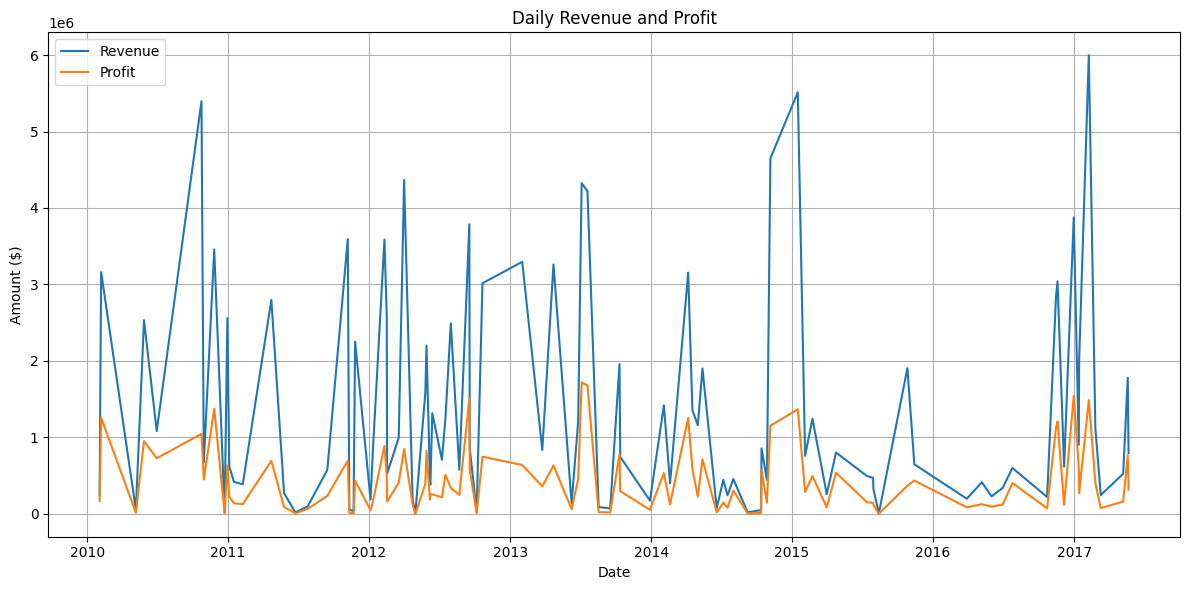

In [10]:
%matplotlib inline
plt.figure(figsize=(12, 6))
plt.plot(daily_sales["Order Date"], daily_sales["Total Revenue"], label='Revenue')
plt.plot(daily_sales["Order Date"], daily_sales["Total Profit"], label='Profit')
plt.title("Daily Revenue and Profit")
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.savefig("daily_sales_trend.png")
plt.show()


In [9]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare data for prediction
df_sales = df.groupby("Order Date")[["Total Revenue"]].sum().reset_index()
df_sales = df_sales.sort_values("Order Date")
df_sales["Days Since"] = (df_sales["Order Date"] - df_sales["Order Date"].min()).dt.days

# Feature and Target
X = df_sales[["Days Since"]]
y = df_sales["Total Revenue"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Model Mean Squared Error: {mse:.2f}")

# Predict next 7 days
future_days = pd.DataFrame({"Days Since": range(df_sales["Days Since"].max() + 1, df_sales["Days Since"].max() + 8)})
future_predictions = model.predict(future_days)

# Show predictions
future_dates = [df_sales["Order Date"].max() + pd.Timedelta(days=i) for i in range(1, 8)]
predicted_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted Revenue": future_predictions
})
print("\n📈 Predicted Sales for Next 7 Days:")
print(predicted_df)



Model Mean Squared Error: 2390240985427.55

📈 Predicted Sales for Next 7 Days:
        Date  Predicted Revenue
0 2017-05-23      942209.152631
1 2017-05-24      941950.296330
2 2017-05-25      941691.440029
3 2017-05-26      941432.583727
4 2017-05-27      941173.727426
5 2017-05-28      940914.871125
6 2017-05-29      940656.014824


In [11]:
# Save prediction
predicted_df.to_csv("next_7_days_sales_prediction.csv", index=False)


In [3]:
import streamlit as st
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import timedelta
import matplotlib.pyplot as plt

# Load data
@st.cache_data
def load_data():
    df = pd.read_csv("Desktop/DATA TYPES/100 Sales Records.csv")
    df["Order Date"] = pd.to_datetime(df["Order Date"])
    df = df.groupby("Order Date")[["Total Revenue"]].sum().reset_index()
    df = df.sort_values("Order Date")
    df["Days Since"] = (df["Order Date"] - df["Order Date"].min()).dt.days
    return df

# Predict future sales
def predict_sales(df, days=7):
    X = df[["Days Since"]]
    y = df["Total Revenue"]
    model = LinearRegression()
    model.fit(X, y)

    # Predict next 7 days
    last_day = df["Days Since"].max()
    future_days = pd.DataFrame({"Days Since": range(last_day+1, last_day+1+days)})
    future_preds = model.predict(future_days)
    future_dates = [df["Order Date"].max() + timedelta(days=i) for i in range(1, days+1)]

    forecast_df = pd.DataFrame({
        "Date": future_dates,
        "Predicted Revenue": future_preds
    })
    return forecast_df

# Load data and predict
df = load_data()
forecast = predict_sales(df)

# Streamlit UI
st.title("📈 Supermarket Sales Forecast Dashboard")
st.write("This dashboard predicts the next 7 days of revenue using linear regression.")

st.subheader("📊 Past Sales Data")
st.line_chart(df.set_index("Order Date")["Total Revenue"])

st.subheader("🔮 Next 7 Days Sales Prediction")
st.dataframe(forecast)

# Chart
st.line_chart(forecast.set_index("Date")["Predicted Revenue"])


2025-07-29 18:23:27.691 No runtime found, using MemoryCacheStorageManager
2025-07-29 18:23:27.707 No runtime found, using MemoryCacheStorageManager
2025-07-29 18:23:27.707 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 18:23:27.707 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 18:23:27.707 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 18:23:27.908 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 18:23:27.908 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 18:23:28.093 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 18:23:28.093 Thread 'MainThread': missing ScriptRunContext! This warning can be ignor

DeltaGenerator()

In [ ]:
st.markdown("## 📦 Business Optimization Insights")

st.info("These recommendations are generated from your sales trends to improve operations and reduce waste.")

# 1. Inventory Optimization
st.markdown("### 🔄 Inventory Optimization")

# Assume 'df' has a daily 'Units Sold' column and 'Order Date'
daily_sales = df.groupby("Order Date")["Units Sold"].sum()

daily_std = daily_sales.std()
lead_time_days = st.slider("Select Expected Lead Time (Days)", 1, 14, 5)
z_score = st.selectbox("Select Desired Service Level", options={
    "90% (Z=1.28)": 1.28,
    "95% (Z=1.65)": 1.65,
    "99% (Z=2.33)": 2.33
})
z_score_value = float(z_score.split("=")[1].replace(")", ""))

safety_stock = z_score_value * daily_std * np.sqrt(lead_time_days)
st.success(f"🛡️ Recommended Safety Stock Level: **{int(safety_stock)} units**")

# 2. Top Performing Regions/Items
st.markdown("### 🌍 Top Performing Regions")
top_regions = df.groupby("Region")["Total Revenue"].sum().sort_values(ascending=False).head(5)
st.bar_chart(top_regions)

# 3. Slow Moving Items
st.markdown("### 🐢 Slow-Moving Items")
slow_items = df[df["Units Sold"] < df["Units Sold"].quantile(0.2)]
slow_summary = slow_items["Item Type"].value_counts().reset_index()
slow_summary.columns = ["Item Type", "Count"]
st.dataframe(slow_summary)

# Optional: Display sales velocity if you have shipment info
if "Ship Date" in df.columns:
    st.markdown("### 🚀 Fast-Selling Items (High Sales Velocity)")
    df["Sales Velocity"] = df["Units Sold"] / ((df["Ship Date"] - df["Order Date"]).dt.days.replace(0, 1))
    high_demand = df[df["Sales Velocity"] > df["Sales Velocity"].mean()]
    st.dataframe(high_demand[["Item Type", "Units Sold", "Sales Velocity"]].head(10))
